In [1]:
import os, sys
import numpy as np
import pandas as pd

# Data Cleaning NYC Housing CSV

## NYC housing
This is a task that takes in a cleans and manipulates a dataset taken from an open source of raw data, done by
reading in a PLUTO(Primary Land Use Tax Lot Output) CSV that contains information about every building in NYC. <br>
Source is [NYC Open Data Portal](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page).

In [2]:
url = 'pluto_shorter.csv'
df = pd.read_csv(url)

C:\Users\Austin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,19,21,23,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Show the dataframe that is returned

In [3]:
# Use df.head() to see the first five rows. A bit messy, no?
df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [4]:
#Column selection
df.columns
my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'assesstot', 'xcoord','ycoord']
df = df[my_cols]

df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,BX,0.00,0.0,7.0,NaN,59400.0,1044510.0,246734.0
1,QN,2.50,1925.0,1.0,11357.0,29738.0,1035479.0,223657.0
2,BK,2.75,1920.0,1.0,11208.0,27370.0,1015989.0,187871.0
3,MN,6.00,1900.0,2.0,10025.0,510300.0,994273.0,228915.0
4,QN,2.00,1901.0,1.0,11421.0,29020.0,1021269.0,190793.0


In [5]:
# Using the df.map() method to replace numbers in the land use column to show more helpful descriptions of column values

land_use_dict = {1: 'One & Two Family Buildings',
                2: 'Multi-Family Walk-Up Buildings',
                3: 'Multi-Family Elevator Buildings',
                4: 'Mixed Residential & Commercial Buildings',
                5: 'Commercial & Office Buildings',
                6: 'Industrial & Manufacturing',
                7: 'Transportation & Utility',
                8: 'Public Facilities & Institutions',
                9: 'Open Space & Outdoor Recreation',
                10: 'Parking Facilities',
                11: 'Vacant Land'}


df['landuse'] = df['landuse'].map(land_use_dict)
df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,BX,0.00,0.0,Transportation & Utility,NaN,59400.0,1044510.0,246734.0
1,QN,2.50,1925.0,One & Two Family Buildings,11357.0,29738.0,1035479.0,223657.0
2,BK,2.75,1920.0,One & Two Family Buildings,11208.0,27370.0,1015989.0,187871.0
3,MN,6.00,1900.0,Multi-Family Walk-Up Buildings,10025.0,510300.0,994273.0,228915.0
4,QN,2.00,1901.0,One & Two Family Buildings,11421.0,29020.0,1021269.0,190793.0


__Finding the average price for buildings in Brooklyn, Manhattan, and Queens with 5-10 floors built between 2000-2010.__

In [6]:

#BK Avg
avg_BK = (df.loc[df.borough == 'BK']) 
avg_BK_floors = avg_BK.loc[(avg_BK['numfloors'] > 5) & (avg_BK['numfloors'] < 10)]
BKbuildings = avg_BK.loc[(avg_BK['yearbuilt'] > 2000) & (avg_BK['yearbuilt'] < 2010)]
print("Avg Price of buildings in Brooklyn with given information: ", round((BKbuildings['assesstot'].mean()), 2))

#MN Avg
avg_MN = (df.loc[df.borough == 'MN']) 
avg_MN_floors = avg_MN.loc[(avg_MN['numfloors'] > 5) & (avg_MN['numfloors'] < 10)]
MNbuildings = avg_MN.loc[(avg_MN['yearbuilt'] > 2000) & (avg_MN['yearbuilt'] < 2010)]
print("Avg Price of buildings in Manhattan with given information: ", round((MNbuildings['assesstot'].mean()), 2))

#QN Avg
avg_QN = (df.loc[df.borough == 'QN']) 
avg_QN_floors = avg_QN.loc[(avg_QN['numfloors'] > 5) & (avg_QN['numfloors'] < 10)]
QNbuildings = avg_QN.loc[(avg_QN['yearbuilt'] > 2000) & (avg_QN['yearbuilt'] < 2010)]
print("Avg Price of buildings in Queens with given information: ", round((QNbuildings['assesstot'].mean()), 2))

Avg Price of buildings in Brooklyn with given information:  574382.78
Avg Price of buildings in Manhattan with given information:  12118517.1
Avg Price of buildings in Queens with given information:  358510.99


__Exploratory visualization using Pandas plotting__

In [7]:
df.landuse.value_counts()

One & Two Family Buildings                  28259
Multi-Family Walk-Up Buildings               6408
Mixed Residential & Commercial Buildings     2813
Vacant Land                                  1358
Commercial & Office Buildings                1060
Multi-Family Elevator Buildings               639
Public Facilities & Institutions              633
Industrial & Manufacturing                    544
Parking Facilities                            520
Transportation & Utility                      351
Open Space & Outdoor Recreation               231
Name: landuse, dtype: int64

In [8]:
#Visualization done for Brooklyn only
BK_buildings = df.loc[df['borough'] == 'BK']
BK_buildings.landuse.value_counts()

One & Two Family Buildings                  7899
Multi-Family Walk-Up Buildings              3192
Mixed Residential & Commercial Buildings    1270
Vacant Land                                  292
Commercial & Office Buildings                277
Industrial & Manufacturing                   216
Public Facilities & Institutions             202
Multi-Family Elevator Buildings              176
Parking Facilities                           175
Transportation & Utility                      93
Open Space & Outdoor Recreation               40
Name: landuse, dtype: int64

__Price Variance with building age__

<AxesSubplot:title={'center':'NYC buildings: Price variance trends with building age'}, xlabel='yearbuilt', ylabel='assesstot'>

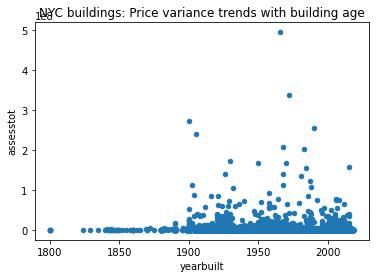

In [10]:
df[df.yearbuilt != 0].plot(x = 'yearbuilt', y = 'assesstot', kind = 'scatter', title = 'NYC buildings: Price variance trends with building age')

__Breakdown of building types within different boroughs__

Which borough would you like to see breakdown of building types for? 
BK


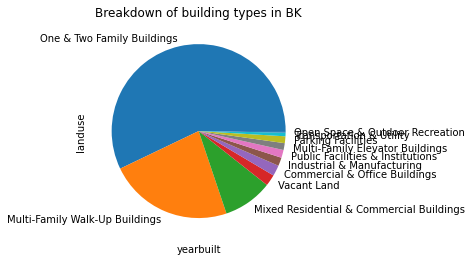

In [9]:
#Breakdown of building types within different boroughs
borough = input("Which borough would you like to see breakdown of building types for? \n")
def breakDown(borough):
    df_b = df.loc[df.borough == borough]
    df_b.landuse.value_counts().plot(kind = 'pie', y = 'landuse', title = "Breakdown of building types in "+borough)
if borough in set(df['borough']):
    breakDown(borough)